In [ ]:
import os
import pandas as pd
import numpy as np
from plotnine import ggplot, aes, geom_boxplot, theme_classic, labs, geom_point
from src.utils.config import load_config
from src.utils.common import create_output_dir




class DurationVisits:
    def __init__(self, config_path="config.json"):
        self.config = load_config(config_path)
        self.data_path = self.config['analyze']["csv_path"]
        self.plot_path = self.config["analyze"]["output_dir"]
        self.time_intervals = float(self.config["average_visits"]["time_intervals"])
        self.fps = float(self.config["average_visits"]["fps"])

    def load_data(self):
        return pd.read_csv(self.data_path)

    def calculate_Duration(self, df):
        
        # Calculate duration (in terms of frame indices) for each track_id
        track_durations = (
            df.groupby('track_id')
            .agg(
                min_idx=('image_idx', 'min'),
                max_idx=('image_idx', 'max'),
                image_name=('image_name', 'min')
            )
            .assign(duration=lambda df: df['max_idx'] - df['min_idx'])
            .reset_index()
            .rename(columns={'min_idx': 'min', 'max_idx': 'max', 'duration':'duration(frames)'})
)
        
        return track_durations

    def save_new_df(self, track_durations):
        """
        Save the processed DataFrame to a CSV file.
        """
        output_csv = os.path.join(self.plot_path, "duration.csv")
        create_output_dir(self.plot_path)  # Ensure the directory exists
        track_durations.to_csv(output_csv, index=False)
        print(f"Results saved to {output_csv}")

    def plot_results(self, track_durations):
        """
        Plot the trajectory counts as a barplot.
        """
        plot = (
            ggplot(df, aes(x="image_name", y="duration(frames)"))
            + geom_boxplot()
            + geom_point(alpha=0.6)
            + theme_classic()
            + labs(
                title=f"duration for each trajectory",
                x="Treatment",
                y="Duration (Frames)",
            )
        )
        plot

    def save_new_df(self, df):
        """
        Save the processed DataFrame to a CSV file.
        """
        output_csv = os.path.join(self.plot_path, "duration.csv")
        create_output_dir(self.plot_path)  # Ensure the directory exists
        df.to_csv(output_csv, index=False)
        print(f"Results saved to {output_csv}")

    def _plot_results(self, df):
        
        plot = (
            ggplot(df, aes(x="image_name", y="duration(frames)"))
            + geom_boxplot()
            + geom_point(alpha=0.6)
            + theme_classic()
            + labs(
                title=f"duration for each trajectory",
                x="Treatment",
                y="Duration (Frames)",
            )
        )

        output_path = os.path.join(self.plot_path, "duration.png")
        plot.save(output_path)
        print(f"Plot saved to {output_path}")

    def __call__(self):
        
        df = self._load_data()
        track_durations = self.calculate_Duration(df)
        self.save_new_df(track_durations)
        self._plot_results(track_durations)




In [91]:
x = DurationVisits()

In [92]:
x()

AttributeError: 'DurationVisits' object has no attribute '_load_data'

In [85]:
df_du = x._calculate_Duration(df)
df_du

,track_id,min,max,image_name,duration(frames)
0,1.0,19,367,13413819-hd_1920_1080_30fps,348


In [86]:
d = x._plot_results(df_du)

In [87]:
d

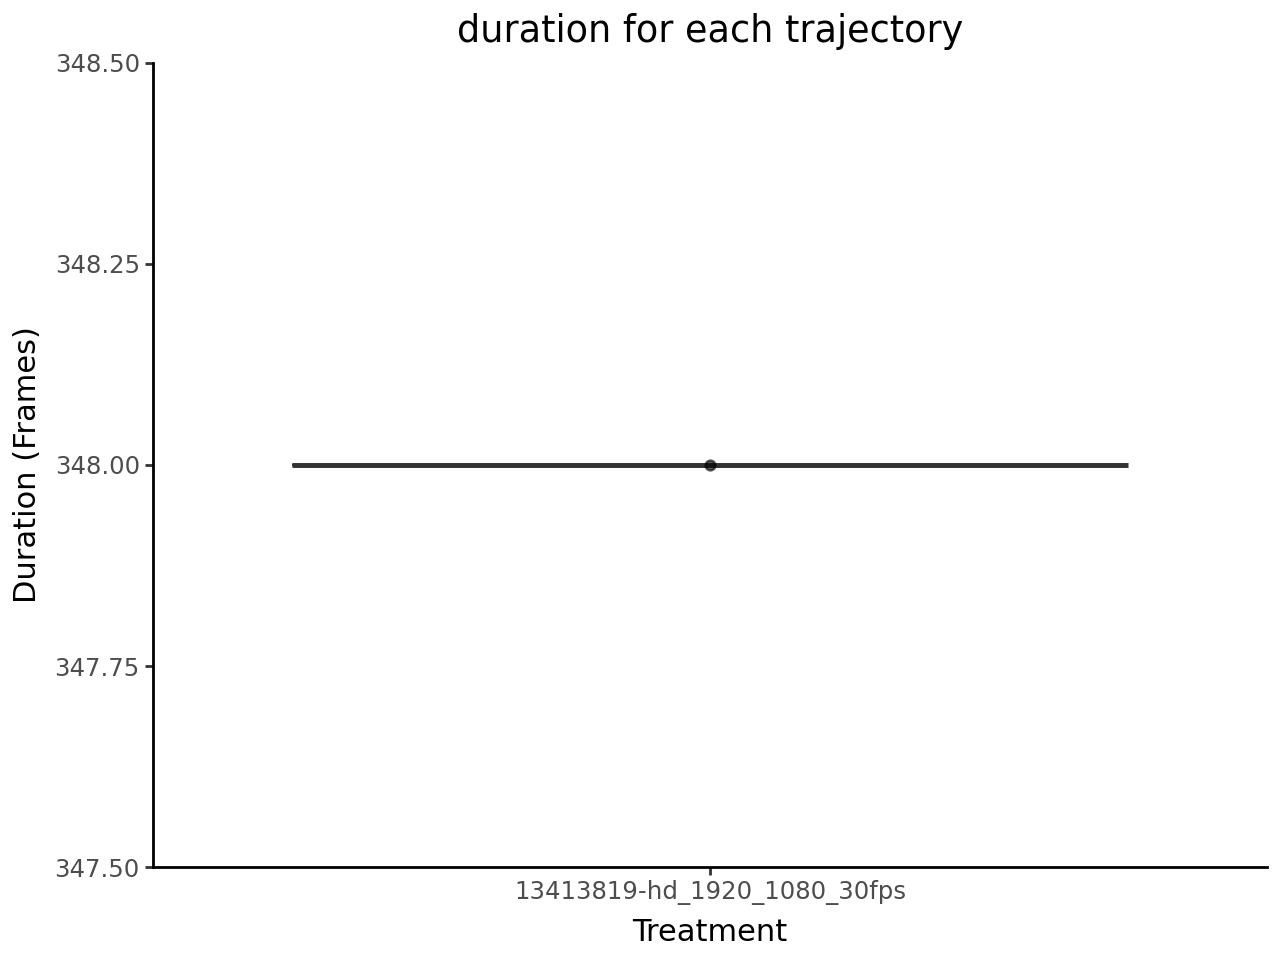

In [89]:
plot = (
            ggplot(df_du, aes(x="image_name", y="duration(frames)"))
            + geom_boxplot()
            + geom_point(alpha=0.6)
            + theme_classic()
            + labs(
                title=f"duration for each trajectory",
                x="Treatment",
                y="Duration (Frames)",
            )
        )
plot

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, geom_jitter, theme_classic, labs

# Create sample data
data = {'image_name': ['img1', 'img2', 'img3', 'img1', 'img2', 'img3'],
        'trajectory_count': [10, 20, 15, 12, 18, 17]}
df = pd.DataFrame(data)

# Plot with plotnine
plot = (
    ggplot(df, aes(x="image_name", y="trajectory_count"))
    + geom_boxplot()
    + geom_jitter(alpha=0.6)
    + theme_classic()
    + labs(
        title="Trajectory Counts Per Image",
        x="Image Name",
        y="Trajectory Count"
    )
)

# Display the plot
plot
